In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [38]:
def surface_temperature(epsilon,eta=2.04,lambda_eq=-1.27):
    F=3.8
    C=12
    CD=244

    b1=(lambda_eq-epsilon*eta)/C
    b2=(epsilon*eta)/C

    b3=eta/CD
    b4=-eta/CD

    alpha_f=(b1+b4)/2*(1+np.sqrt(1-4*(b1*b4-b2*b3)/(b1+b4)**2))
    alpha_s=(b1+b4)/2*(1-np.sqrt(1-4*(b1*b4-b2*b3)/(b1+b4)**2))

    tau_f=-1/alpha_f
    tau_s=-1/alpha_s

    xi_f=(alpha_f-b1)/b2
    xi_s=(alpha_s-b1)/b2

    psi_f=(F/lambda_eq *(1-xi_s))/(xi_f-xi_s)
    psi_s=(F/lambda_eq*(1-xi_f))/(xi_s-xi_f)

    t=np.arange(0,1000,.2)
    T=F/(-lambda_eq ) + psi_f*np.exp(-t/tau_f) + psi_s*np.exp(-t/tau_s)
    TD=F/(-lambda_eq ) + xi_f*psi_f*np.exp(-t/tau_f) + xi_s*psi_s*np.exp(-t/tau_s)
    
    plt.plot(t,T)

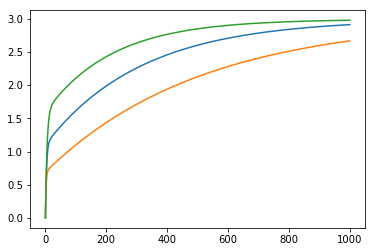

In [39]:
surface_temperature(1)
surface_temperature(2)
surface_temperature(.5)